In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./spam.csv", encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.iloc[:,0:2]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

<Axes: xlabel='v1'>

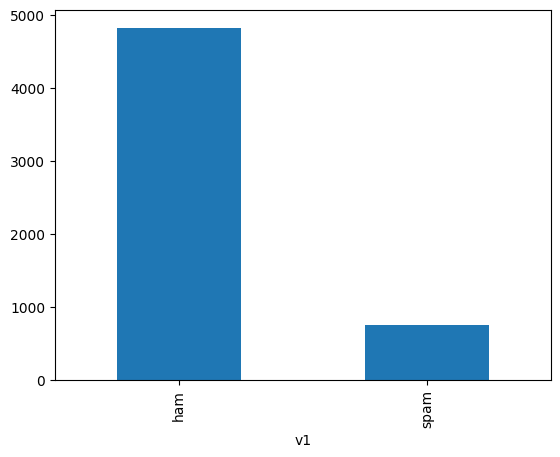

In [8]:
df['v1'].value_counts().plot(kind='bar')

In [9]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

([<matplotlib.patches.Wedge at 0x20139207fd0>,
 [Text(-1.0038714981945518, 0.4497132587689916, ''),
  Text(1.0038714771419537, -0.44971330576360763, '')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

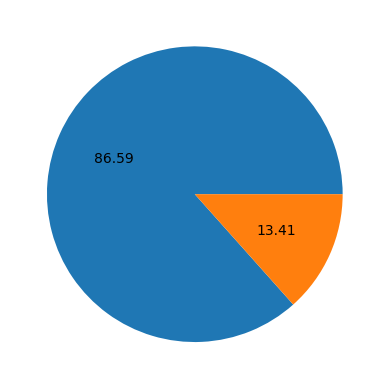

In [10]:
plt.pie(df['target'].value_counts(), autopct='%0.2f')

In [11]:
df.shape

(5572, 2)

In [12]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['target'] = le.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates()

In [18]:
df.shape

(5169, 2)

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aneka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['characters'] = df['text'].apply(lambda x : len(x))

In [22]:
df['words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [23]:
df['sentences'] = df['text'].apply(lambda x : len(nltk.tokenize.sent_tokenize(x, language='english')))

<Axes: >

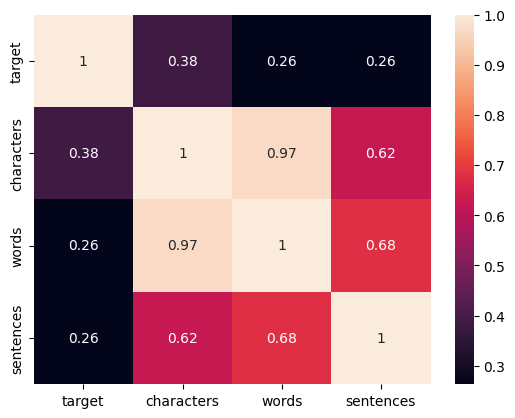

In [24]:
sns.heatmap(df.drop('text', axis=1).corr(), annot=True)

In [25]:
df.describe()

,target,characters,words,sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
df[df['target'] == 0].describe()

,target,characters,words,sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [27]:
df[df['target'] == 1].describe()

,target,characters,words,sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

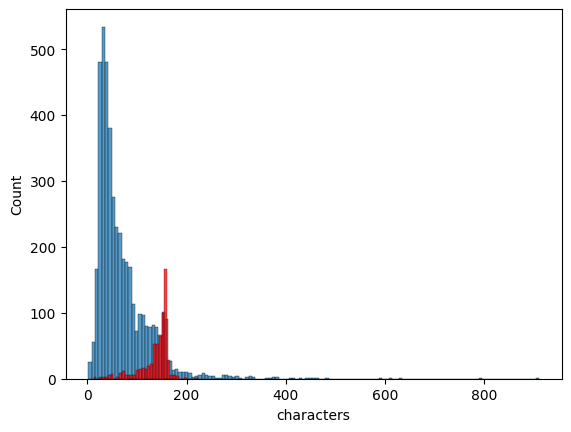

In [28]:
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'], color='red')

<Axes: xlabel='words', ylabel='Count'>

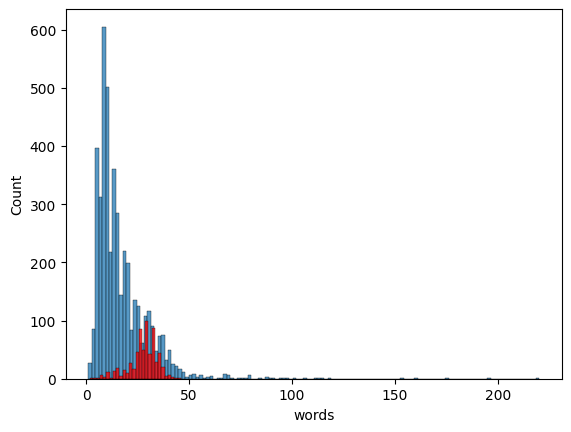

In [29]:
sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'], color='red')

<Axes: xlabel='sentences', ylabel='Count'>

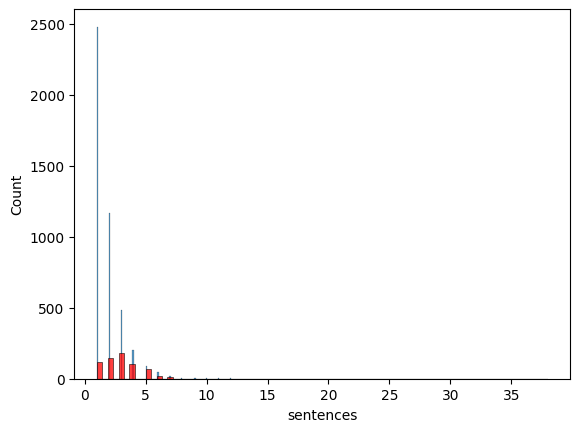

In [30]:
sns.histplot(df[df['target'] == 0]['sentences'])
sns.histplot(df[df['target'] == 1]['sentences'], color='red')

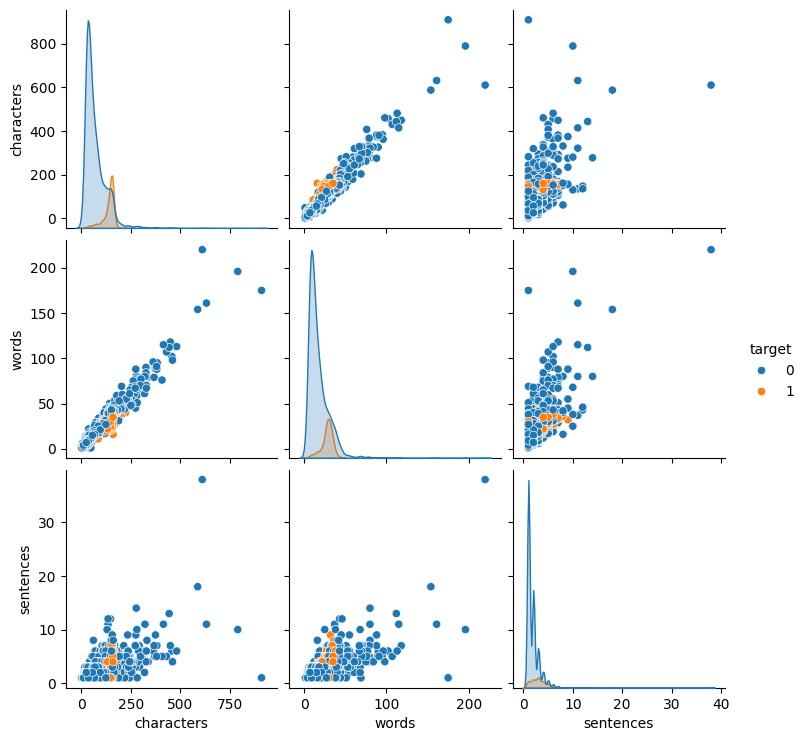

In [31]:
sns.pairplot(df, hue='target')

In [32]:
df['text'] = df['text'].apply(lambda x : x.lower())

In [33]:
df.head()

,target,text,characters,words,sentences
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df['tokens'] = df['text'].apply(lambda x : nltk.word_tokenize(x))

In [35]:
df['tokens'][0]


['go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [36]:
print(df['text'][0])

go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...


In [37]:
from nltk.corpus import stopwords
import string

In [38]:
stopwords.words('english')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def stop_words(x):
    
    # Removing special chars
    y = []
    for i in x:
        if i.isalnum(): 
            y.append(i)
    text = y[:]
    y.clear()  
          
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()  
            
    for i in text:
        y.append(ps.stem(i))
    
    # print(y)        
    return ' '.join(y)       

df['tokens'] = df['tokens'].apply(stop_words)

In [41]:
df.head()

,target,text,characters,words,sentences,tokens
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color = 'white')

In [43]:
spam_wc = wc.generate(df[df['target'] == 1]['tokens'].str.cat(sep=' '))

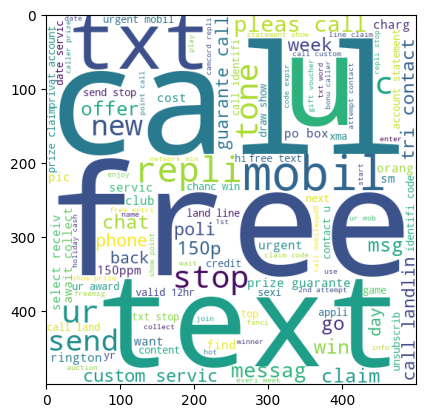

In [44]:
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target'] == 0]['tokens'].str.cat(sep=' '))

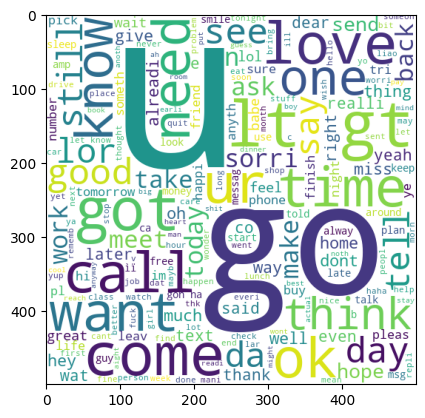

In [46]:
plt.imshow(ham_wc)

In [47]:
spam_corpus = []

for msg in df[df['target']==1]['tokens'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [48]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [49]:
from collections import Counter

<Axes: ylabel='0'>

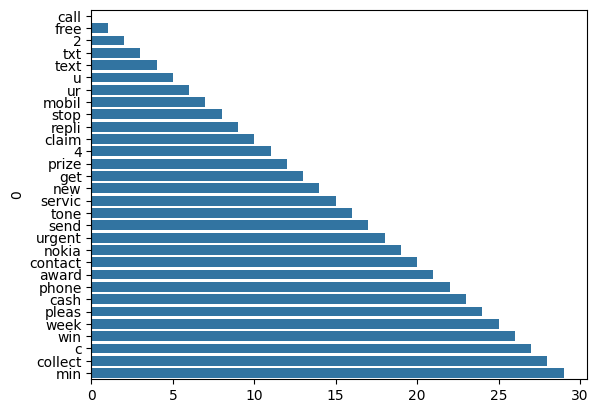

In [50]:
sns.barplot(
        pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
        # pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
    )

In [51]:
ham_corpus = []

for msg in df[df['target']==0]['tokens'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

<Axes: ylabel='0'>

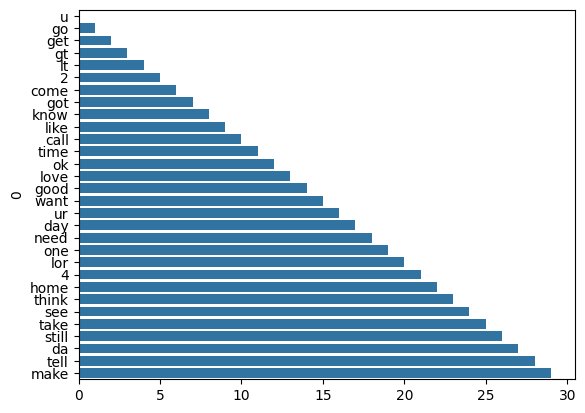

In [52]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

Model

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
tfidf_vectorizer = TfidfVectorizer()

In [55]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokens'])

In [56]:
tfidf_matrix

<5169x6708 sparse matrix of type '<class 'numpy.float64'>'
	with 40628 stored elements in Compressed Sparse Row format>

In [57]:
user_vector = tfidf_vectorizer.transform(df['text'][0])
similarities = cosine_similarity(user_vector, tfidf_matrix)

ValueError: Iterable over raw text documents expected, string object received.